# Import the necessary columns

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.mixture import GaussianMixture 
import itertools

# Pre-processing

In [1]:
data = pd.read_csv('US_Accidents_March23.csv')
pd.set_option('display.max_columns', None)
print(data.head())  # Display the first few rows of the DataFrame

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0  39.865147 -84.058723      NaN      NaN          0.01   
1  39.928059 -82.831184      NaN      NaN          0.01   
2  39.063148 -84.032608      NaN      NaN          0.01   
3  39.747753 -84.205582      NaN      NaN          0.01   
4  39.627781 -84.188354      NaN      NaN          0.01   

                                         Description  \
0  Right lane blocked due to accident on I-70 Eas...   
1  Accident on Brice Rd at Tussing Rd. Expect del...   
2  Accident on OH-32 State Route 32 Westbound at .

In [2]:
# check the variance of boolean columns
columns = ['Amenity', 'Railway', 'Roundabout','Stop', 'Traffic_Calming', 'Crossing', 'Junction', 'Station', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Bump', 'Give_Way', 'No_Exit', 'Turning_Loop']
[data[col_name].value_counts()*100/len(data) for col_name in columns]

[False    98.753506
 True      1.246494
 Name: Amenity, dtype: float64,
 False    99.133339
 True      0.866661
 Name: Railway, dtype: float64,
 False    99.996778
 True      0.003222
 Name: Roundabout, dtype: float64,
 False    97.22619
 True      2.77381
 Name: Stop, dtype: float64,
 False    99.901687
 True      0.098313
 Name: Traffic_Calming, dtype: float64,
 False    88.694119
 True     11.305881
 Name: Crossing, dtype: float64,
 False    92.607235
 True      7.392765
 Name: Junction, dtype: float64,
 False    97.387543
 True      2.612457
 Name: Station, dtype: float64,
 False    85.200392
 True     14.799608
 Name: Traffic_Signal, dtype: float64,
 Day      69.025376
 Night    30.673837
 Name: Sunrise_Sunset, dtype: float64,
 Day      73.697317
 Night    26.001896
 Name: Civil_Twilight, dtype: float64,
 Day      78.621199
 Night    21.078014
 Name: Nautical_Twilight, dtype: float64,
 Day      82.521000
 Night    17.178213
 Name: Astronomical_Twilight, dtype: float64,
 False    9

In [3]:
data.shape

(7728394, 46)

In [4]:
# drop unnecessary columns (either relevant info with other ones or there is not variance)
data.drop(['Country', 'Source','Start_Lat', 'Start_Lng','Description', 'Airport_Code', 'Amenity', 'Railway', 'Roundabout','Stop', 'Traffic_Calming', 'Station', 'Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight', 'End_Lng','End_Lat', 'Bump', 'Give_Way', 'No_Exit', 'Turning_Loop'] , axis=1, inplace=True)
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Timezone', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Crossing', 'Junction',
       'Traffic_Signal', 'Sunrise_Sunset'],
      dtype='object')

In [5]:
data.isna().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Distance(mi)               0
Street                 10869
City                     253
County                     0
State                      0
Zipcode                 1915
Timezone                7808
Weather_Timestamp     120228
Temperature(F)        163853
Wind_Chill(F)        1999019
Humidity(%)           174144
Pressure(in)          140679
Visibility(mi)        177098
Wind_Direction        175206
Wind_Speed(mph)       571233
Precipitation(in)    2203586
Weather_Condition     173459
Crossing                   0
Junction                   0
Traffic_Signal             0
Sunrise_Sunset         23246
dtype: int64

In [6]:
data.isna().sum() * 100 /len(data)

ID                    0.000000
Severity              0.000000
Start_Time            0.000000
End_Time              0.000000
Distance(mi)          0.000000
Street                0.140637
City                  0.003274
County                0.000000
State                 0.000000
Zipcode               0.024779
Timezone              0.101030
Weather_Timestamp     1.555666
Temperature(F)        2.120143
Wind_Chill(F)        25.865904
Humidity(%)           2.253301
Pressure(in)          1.820288
Visibility(mi)        2.291524
Wind_Direction        2.267043
Wind_Speed(mph)       7.391355
Precipitation(in)    28.512858
Weather_Condition     2.244438
Crossing              0.000000
Junction              0.000000
Traffic_Signal        0.000000
Sunrise_Sunset        0.300787
dtype: float64

In [7]:
data = data.dropna()
data.isna().sum() * 100 /len(data)

ID                   0.0
Severity             0.0
Start_Time           0.0
End_Time             0.0
Distance(mi)         0.0
Street               0.0
City                 0.0
County               0.0
State                0.0
Zipcode              0.0
Timezone             0.0
Weather_Timestamp    0.0
Temperature(F)       0.0
Wind_Chill(F)        0.0
Humidity(%)          0.0
Pressure(in)         0.0
Visibility(mi)       0.0
Wind_Direction       0.0
Wind_Speed(mph)      0.0
Precipitation(in)    0.0
Weather_Condition    0.0
Crossing             0.0
Junction             0.0
Traffic_Signal       0.0
Sunrise_Sunset       0.0
dtype: float64

In [8]:
data.shape

(5208006, 25)

In [9]:
# check the number of unique values of each column
unique = pd.DataFrame()
unique['column'] = data.columns
unique['number of unique'] = [len(data[col_name].unique()) for col_name in data.columns]
unique

,column,number of unique
0,ID,5208006
1,Severity,4
2,Start_Time,3906793
3,End_Time,4436336
4,Distance(mi),20775
5,Street,276722
6,City,11295
7,County,1735
8,State,49
9,Zipcode,624486


In [10]:
data.shape

(5208006, 25)

In [11]:
# duplicates based on 4 columns
5208006 - data.duplicated(subset=['Start_Time', 'State', 'County', 'Street']).sum()

4591456

In [12]:
# duplicates based on 3 columns
5208006 - data.duplicated(subset=['Start_Time', 'State', 'County']).sum()

4379555

* The difference between the cases of duplicates is not significant, hence we decided to move on with the 2nd case where we check the three columns, in order to avoid possible erroneous values in the Street column.

In [13]:
# Specify columns for which you want to remove duplicates
columns_to_check_1 = ['Start_Time', 'State', 'County']

# Remove duplicates based on the specified columns
data = data.drop_duplicates(subset=columns_to_check_1)
data.shape

(4379555, 25)

In [14]:
# Specify columns for which you want to remove duplicates
columns_to_check_2 = ['End_Time', 'State', 'County']

# Remove duplicates based on the specified columns
data = data.drop_duplicates(subset=columns_to_check_2)
data.shape

(4337626, 25)

In [15]:
# Specify columns for which you want to remove duplicates
columns_to_check_3 = ['Weather_Timestamp', 'State', 'County']

# Remove duplicates based on the specified columns
data = data.drop_duplicates(subset=columns_to_check_3)
data.shape

(2740460, 25)

In [16]:
print(data.head()) 

      ID  Severity           Start_Time             End_Time  Distance(mi)  \
5    A-6         3  2016-02-08 07:44:26  2016-02-08 08:14:26          0.01   
9   A-10         3  2016-02-08 08:10:04  2016-02-08 08:40:04          0.01   
20  A-21         2  2016-02-08 10:11:15  2016-02-08 10:41:15          0.00   
22  A-23         2  2016-02-08 11:53:19  2016-02-08 12:23:19          0.01   
23  A-24         3  2016-02-08 12:00:00  2016-02-08 12:45:00          0.01   

             Street         City      County State     Zipcode    Timezone  \
5    Westerville Rd  Westerville    Franklin    OH       43081  US/Eastern   
9    Westerville Rd  Westerville    Franklin    OH       43081  US/Eastern   
20     Brookhill Dr     Columbus    Franklin    OH  43230-1765  US/Eastern   
22  Springboro Pike   Miamisburg  Montgomery    OH       45342  US/Eastern   
23      North Fwy S     Columbus    Franklin    OH       43211  US/Eastern   

      Weather_Timestamp  Temperature(F)  Wind_Chill(F)  Humidi

In [17]:
data["Start_Time"] = pd.to_datetime(data["Start_Time"], format='%Y-%m-%d %H:%M:%S', errors='coerce')
data["End_Time"] = pd.to_datetime(data["End_Time"], format='%Y-%m-%d %H:%M:%S', errors='coerce')
data["Weather_Timestamp"] = pd.to_datetime(data["Weather_Timestamp"], format='%Y-%m-%d %H:%M:%S', errors='coerce')
data["Severity"] = data["Severity"].astype('int8')
data["Humidity(%)"] = data["Humidity(%)"].astype('int8')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2740460 entries, 5 to 7728393
Data columns (total 25 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int8          
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   Distance(mi)       float64       
 5   Street             object        
 6   City               object        
 7   County             object        
 8   State              object        
 9   Zipcode            object        
 10  Timezone           object        
 11  Weather_Timestamp  datetime64[ns]
 12  Temperature(F)     float64       
 13  Wind_Chill(F)      float64       
 14  Humidity(%)        int8          
 15  Pressure(in)       float64       
 16  Visibility(mi)     float64       
 17  Wind_Direction     object        
 18  Wind_Speed(mph)    float64       
 19  Precipitation(in)  float64       
 20  Weather_Condition  objec

In [18]:
selected_columns = data[['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
                         'Wind_Speed(mph)', 'Precipitation(in)' ]]

# Calculate the IQR for each column
Q1 = selected_columns.quantile(0.25)
Q3 = selected_columns.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5 

# Identify the outliers in each column
outliers = ((selected_columns < (Q1 - threshold * IQR)) | (selected_columns > (Q3 + threshold * IQR)))

# Compute the percentage of outliers for each column
outliers_percentage = (outliers.sum() / len(selected_columns)) * 100

# Print the percentage of outliers for each column
print(outliers_percentage)

Severity             20.086920
Distance(mi)         13.549258
Temperature(F)        0.447845
Wind_Chill(F)         0.740131
Humidity(%)           0.000000
Pressure(in)          7.232326
Visibility(mi)       21.340760
Wind_Speed(mph)       2.180473
Precipitation(in)     8.386183
dtype: float64


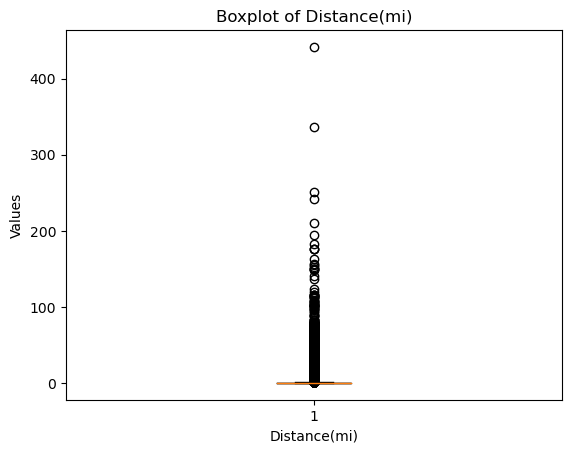

In [19]:
import matplotlib.pyplot as plt
# Create a boxplot of 'Distance(mi)'
plt.boxplot(data['Distance(mi)'])

# Set the title and labels
plt.title('Boxplot of Distance(mi)')
plt.xlabel('Distance(mi)')
plt.ylabel('Values')

# Display the plot
plt.show()

In [20]:
# Display statistics of 'Distance(mi)'
Distance_stats = data['Distance(mi)'].describe()

# Print the statistics
print(Distance_stats)

count    2.740460e+06
mean     5.949377e-01
std      1.976667e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.400000e-02
75%      4.520000e-01
max      4.417500e+02
Name: Distance(mi), dtype: float64


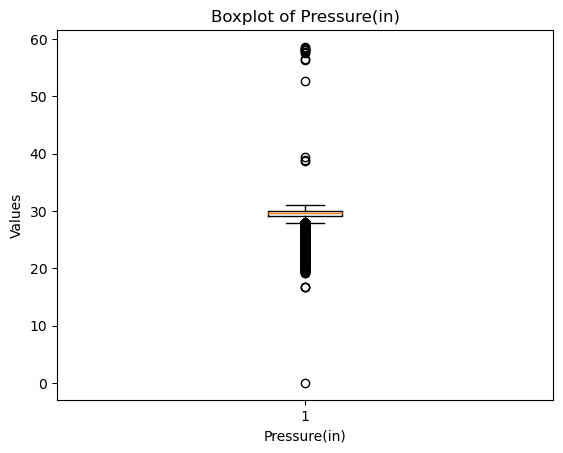

In [21]:
# Create a boxplot of 'Pressure(in)'
plt.boxplot(data['Pressure(in)'])

# Set the title and labels
plt.title('Boxplot of Pressure(in)')
plt.xlabel('Pressure(in)')
plt.ylabel('Values')

# Display the plot
plt.show()

In [22]:
# Display statistics of 'Pressure(in)'
Pressure_stats = data['Pressure(in)'].describe()

# Print the statistics
print(Pressure_stats)

count    2.740460e+06
mean     2.930226e+01
std      1.141875e+00
min      0.000000e+00
25%      2.913000e+01
50%      2.962000e+01
75%      2.993000e+01
max      5.863000e+01
Name: Pressure(in), dtype: float64


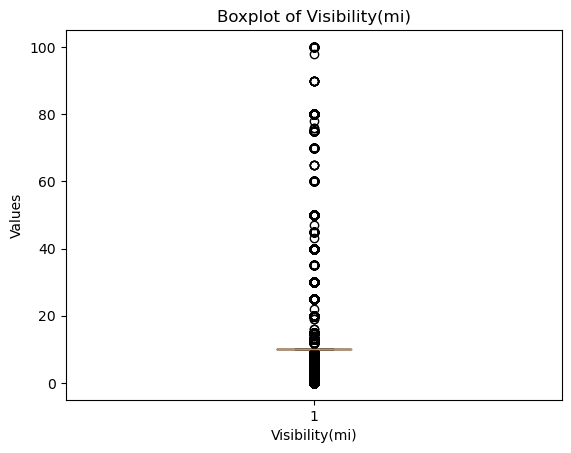

In [23]:
# Create a boxplot of 'Visibility(mi)'
plt.boxplot(data['Visibility(mi)'])

# Set the title and labels
plt.title('Boxplot of Visibility(mi)')
plt.xlabel('Visibility(mi)')
plt.ylabel('Values')

plt.show()

In [24]:
# Display statistics of 'Visibility(mi)'
Visibility_stats = data['Visibility(mi)'].describe()

# Print the statistics
print(Visibility_stats)

count    2.740460e+06
mean     8.936548e+00
std      2.782006e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.000000e+02
Name: Visibility(mi), dtype: float64


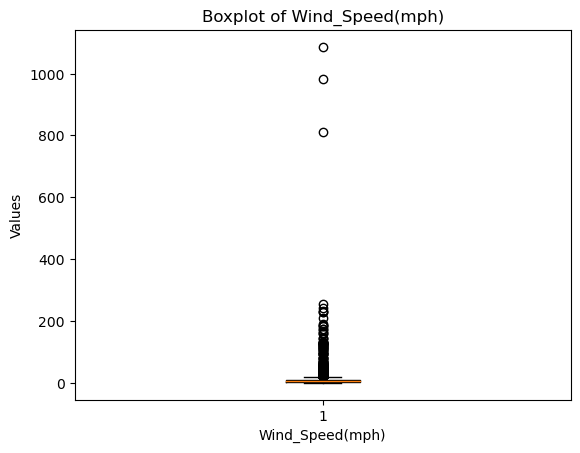

In [25]:
# Create a boxplot of 'Wind_Speed(mph)'
plt.boxplot(data['Wind_Speed(mph)'])

# Set the title and labels
plt.title('Boxplot of Wind_Speed(mph)')
plt.xlabel('Wind_Speed(mph)')
plt.ylabel('Values')

plt.show()

In [26]:
# Display statistics of 'Wind_Speed(mph)'
Wind_Speed_stats = data['Wind_Speed(mph)'].describe()

# Print the statistics
print(Wind_Speed_stats)

count    2.740460e+06
mean     7.257200e+00
std      5.575270e+00
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64


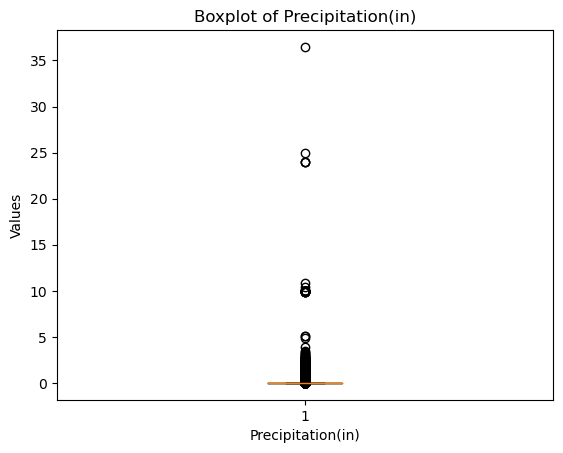

In [27]:
# Create a boxplot of 'Precipitation(in)'
plt.boxplot(data['Precipitation(in)'])

# Set the title and labels
plt.title('Boxplot of Precipitation(in)')
plt.xlabel('Precipitation(in)')
plt.ylabel('Values')

plt.show()

In [28]:
# Display statistics of 'Precipitation(in) '
Precipitation_stats = data['Precipitation(in)'].describe()

# Print the statistics
print(Precipitation_stats)

count    2.740460e+06
mean     6.586197e-03
std      7.104976e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.647000e+01
Name: Precipitation(in), dtype: float64


In [29]:
data['Severity'].value_counts()

2    2189986
3     456025
4      57163
1      37286
Name: Severity, dtype: int64

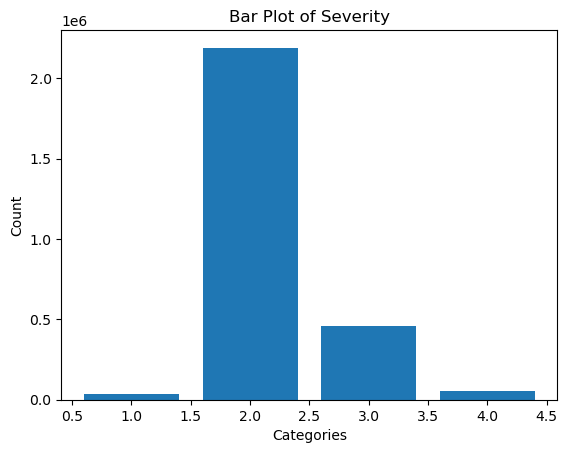

In [30]:
# Calculate the counts for each category in 'Severity'
category_counts = data['Severity'].value_counts()

plt.bar(category_counts.index, category_counts.values)

# Set the title and labels
plt.title('Bar Plot of Severity')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show()

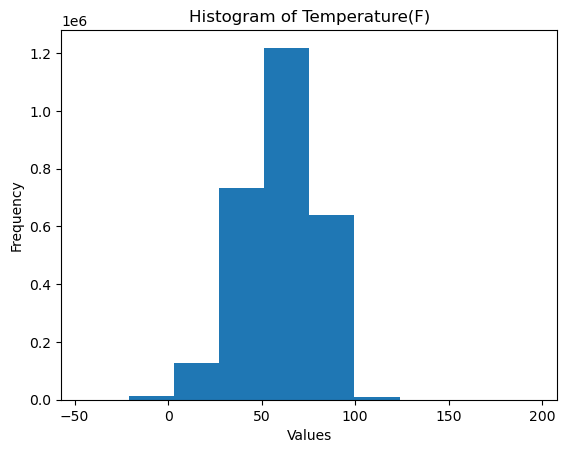

In [31]:
# Create a histogram of 'Temperature(F)'
plt.hist(data['Temperature(F)'])

# Set the title and labels
plt.title('Histogram of Temperature(F)')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

In [32]:
# Display statistics of 'Temperature(F)'
Temperature_stats = data['Temperature(F)'].describe()

# Print the statistics
print(Temperature_stats)

count    2.740460e+06
mean     6.020359e+01
std      1.921317e+01
min     -4.500000e+01
25%      4.700000e+01
50%      6.200000e+01
75%      7.500000e+01
max      1.960000e+02
Name: Temperature(F), dtype: float64


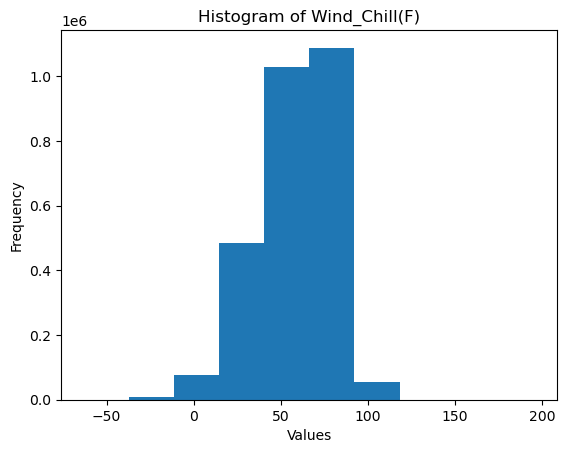

In [33]:
# Create a histogram of 'Wind_Chill(F)'
plt.hist(data['Wind_Chill(F)'])

# Set the title and labels
plt.title('Histogram of Wind_Chill(F)')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

In [34]:
# Display statistics of 'Wind_Chill(F)'
Wind_Chill_stats = data['Wind_Chill(F)'].describe()

# Print the statistics
print(Wind_Chill_stats)

count    2.740460e+06
mean     5.877977e+01
std      2.150722e+01
min     -6.300000e+01
25%      4.400000e+01
50%      6.200000e+01
75%      7.500000e+01
max      1.960000e+02
Name: Wind_Chill(F), dtype: float64


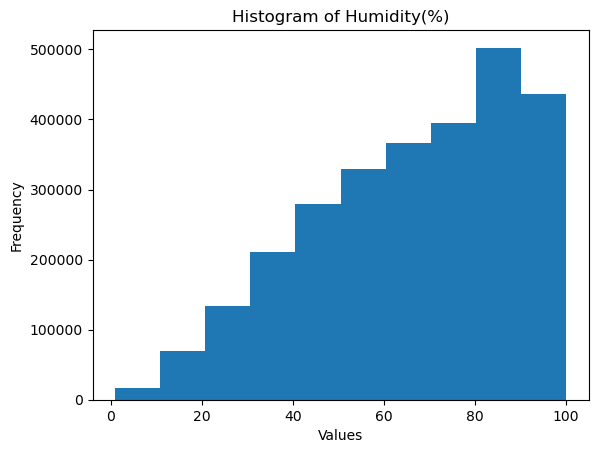

In [35]:
# Create a histogram of 'Humidity(%)'
plt.hist(data['Humidity(%)'])

# Set the title and labels
plt.title('Histogram of Humidity(%)')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

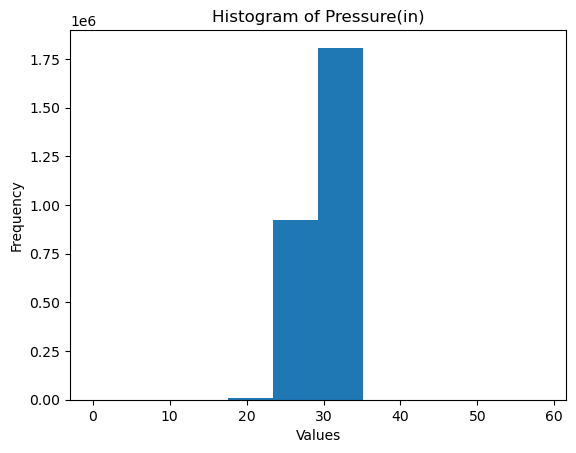

In [36]:
# Create a histogram of 'Pressure(in)'
plt.hist(data['Pressure(in)'])

# Set the title and labels
plt.title('Histogram of Pressure(in)')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

In [37]:
# Display statistics of 'Pressure(in)'
Pressure_stats = data['Pressure(in)'].describe()

# Print the statistics
print(Pressure_stats)

count    2.740460e+06
mean     2.930226e+01
std      1.141875e+00
min      0.000000e+00
25%      2.913000e+01
50%      2.962000e+01
75%      2.993000e+01
max      5.863000e+01
Name: Pressure(in), dtype: float64


#### Filter out extreme values.

In [38]:
data = data[(data['Temperature(F)'] >= -30) & (data['Temperature(F)'] <= 110)]
data = data[(data['Wind_Chill(F)'] >= -63) & (data['Wind_Chill(F)'] <= 110)]
data = data[(data['Wind_Speed(mph)'] <= 100)]
data = data[(data['Pressure(in)'] >= 26) & (data['Pressure(in)'] <= 32)]
data = data[(data['Visibility(mi)'] <= 30)]
data = data[(data['Distance(mi)'] <= 20)]
data.head(5) 

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,County,State,Zipcode,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,0.01,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,2016-02-08 07:51:00,37.9,35.5,97,29.63,7.0,SSW,3.5,0.03,Light Rain,False,False,False,Day
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,0.01,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,2016-02-08 08:28:00,37.4,33.8,100,29.62,3.0,SSW,4.6,0.02,Light Rain,False,False,False,Day
20,A-21,2,2016-02-08 10:11:15,2016-02-08 10:41:15,0.00,Brookhill Dr,Columbus,Franklin,OH,43230-1765,US/Eastern,2016-02-08 10:14:00,33.8,29.6,100,29.62,2.0,NNW,4.6,0.01,Light Snow,False,False,False,Day
22,A-23,2,2016-02-08 11:53:19,2016-02-08 12:23:19,0.01,Springboro Pike,Miamisburg,Montgomery,OH,45342,US/Eastern,2016-02-08 11:53:00,35.1,28.6,89,29.65,6.0,WSW,8.1,0.02,Overcast,False,False,True,Day
23,A-24,3,2016-02-08 12:00:00,2016-02-08 12:45:00,0.01,North Fwy S,Columbus,Franklin,OH,43211,US/Eastern,2016-02-08 11:51:00,37.0,32.4,96,29.63,8.0,West,5.8,0.00,Overcast,False,False,False,Day


In [39]:
data.shape

(2625063, 25)

In [40]:
# Subtract 'start_time' from 'end_time' to calculate the time interval
data['Duration'] = data['End_Time'] - data['Start_Time']

# Access the time interval values
print(data['Duration'])

5         0 days 00:30:00
9         0 days 00:30:00
20        0 days 00:30:00
22        0 days 00:30:00
23        0 days 00:45:00
                ...      
7728385   0 days 00:28:23
7728386   0 days 00:28:23
7728390   0 days 00:26:53
7728391   0 days 00:28:28
7728393   0 days 00:29:25
Name: Duration, Length: 2625063, dtype: timedelta64[ns]


In [41]:
# Filter out values greater than 2 days or 48 hours
data = data[data['Duration'] <= pd.Timedelta(days=2)]

In [42]:
data.shape

(2621725, 26)

In [43]:
data.drop(['Weather_Timestamp'] , axis=1, inplace=True)
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Timezone', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Crossing', 'Junction', 'Traffic_Signal',
       'Sunrise_Sunset', 'Duration'],
      dtype='object')

In [44]:
# check the number of unique values of each column
unique = pd.DataFrame()
unique['column'] = data.columns
unique['number of unique'] = [len(data[col_name].unique()) for col_name in data.columns]
unique

,column,number of unique
0,ID,2621725
1,Severity,4
2,Start_Time,2414675
3,End_Time,2483600
4,Distance(mi),14263
5,Street,224240
6,City,10833
7,County,1690
8,State,49
9,Zipcode,455946


In [45]:
# run once
# data.to_csv('Clean_US_Accidents.csv', encoding='utf-8', index=False)

In [ ]:
data.drop(['End_Time'] , axis=1, inplace=True)

## Encoding

In [48]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'Distance(mi)', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Crossing', 'Junction', 'Traffic_Signal',
       'Sunrise_Sunset', 'Duration'],
      dtype='object')

In [49]:
encoded_df =  data

# encode binary columns
encoded_df['Sunrise_Sunset'] = encoded_df['Sunrise_Sunset'].apply(lambda x: 1 if x == 'Day' else 0)
encoded_df['Crossing'] = encoded_df['Crossing'].apply(lambda x: 1 if x == 'True' else 0)
encoded_df['Junction'] = encoded_df['Junction'].apply(lambda x: 1 if x == 'True' else 0)
encoded_df['Traffic_Signal'] = encoded_df['Traffic_Signal'].apply(lambda x: 1 if x == 'True' else 0)

In [50]:
# check if encoding is necessary for both Start and End (year, and month)
#print(len(encoded_df) - (encoded_df['Start_Time'].dt.year == encoded_df['End_Time'].dt.year).sum())
#print(len(encoded_df) - (encoded_df['Start_Time'].dt.strftime('%m') == encoded_df['End_Time'].dt.strftime('%m')).sum())

In [51]:
# Extract Year, Month, and Weekday from 'Start_Time' column
encoded_df['Start_Year'] = encoded_df['Start_Time'].dt.year
encoded_df['Start_Month'] = encoded_df['Start_Time'].dt.strftime('%B')
encoded_df['Start_Weekday'] = encoded_df['Start_Time'].dt.strftime('%A')

# Extract Year, Month, and Weekday from 'End_Time' column
#encoded_df['End_Year'] = encoded_df['End_Time'].dt.year
#encoded_df['End_Month'] = encoded_df['End_Time'].dt.strftime('%B')
#encoded_df['End_Weekday'] = encoded_df['End_Time'].dt.strftime('%A')

encoded_df.head()

,ID,Severity,Start_Time,Distance(mi),Street,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Duration,Start_Year,Start_Month,Start_Weekday
5,A-6,3,2016-02-08 07:44:26,0.01,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,37.9,35.5,97,29.63,7.0,SSW,3.5,0.03,Light Rain,0,0,0,1,0 days 00:30:00,2016,February,Monday
9,A-10,3,2016-02-08 08:10:04,0.01,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,37.4,33.8,100,29.62,3.0,SSW,4.6,0.02,Light Rain,0,0,0,1,0 days 00:30:00,2016,February,Monday
20,A-21,2,2016-02-08 10:11:15,0.00,Brookhill Dr,Columbus,Franklin,OH,43230-1765,US/Eastern,33.8,29.6,100,29.62,2.0,NNW,4.6,0.01,Light Snow,0,0,0,1,0 days 00:30:00,2016,February,Monday
22,A-23,2,2016-02-08 11:53:19,0.01,Springboro Pike,Miamisburg,Montgomery,OH,45342,US/Eastern,35.1,28.6,89,29.65,6.0,WSW,8.1,0.02,Overcast,0,0,0,1,0 days 00:30:00,2016,February,Monday
23,A-24,3,2016-02-08 12:00:00,0.01,North Fwy S,Columbus,Franklin,OH,43211,US/Eastern,37.0,32.4,96,29.63,8.0,West,5.8,0.00,Overcast,0,0,0,1,0 days 00:45:00,2016,February,Monday


In [52]:
encoded_df['Weather_Condition'].unique()

array(['Light Rain', 'Light Snow', 'Overcast', 'Mostly Cloudy', 'Snow',
       'Light Freezing Drizzle', 'Rain', 'Heavy Rain',
       'Light Freezing Rain', 'Cloudy', 'Clear', 'Light Freezing Fog',
       'Scattered Clouds', 'Haze', 'Partly Cloudy', 'Fair', 'Fog',
       'Smoke', 'Blowing Dust / Windy', 'Fair / Windy',
       'Light Rain / Windy', 'Light Thunderstorms and Rain',
       'Showers in the Vicinity', 'Light Rain Shower',
       'Light Rain with Thunder', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Light Drizzle',
       'Thunder in the Vicinity', 'T-Storm', 'Thunder', 'Heavy T-Storm',
       'Heavy T-Storm / Windy', 'Blowing Snow', 'Drizzle',
       'Thunderstorms and Rain', 'Light Thunderstorms and Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Light Ice Pellets',
       'Light Rain Showers', 'Mist', 'Ice Pellets', 'Heavy Drizzle',
       'N/A Precipitation', 'Cloudy / Windy',
       'Heavy Thunderstorms and Snow', 'Rain / Windy',
       'Heavy 

In [53]:
# define the mapping of patterns to new labels ('windy' is covered from other columns)
pattern_mapping = {
    'Rain': 'Rain',
    'Snow': 'Snow',
    'Overcast': 'Overcast',
    'Drizzle': 'Drizzle',
    'Cloud': 'Cloudy',
    'Fog': 'Fog',
    'Fair': 'Fair',
    'Dust': 'Dust',
    'Showers': 'Showers',
    'Sleet' : 'Sleet',
    'Thunder' : 'Thunder',
    'Sand' : 'Sand',
    'Storm' : 'Storm',
    'Smoke' : 'Smoke',
    'Ice Pellets' : 'Ice Pellets',
    'Haze' : 'Haze',
    'Wintry Mix' : 'Wintry Mix',
    'Squalls' : 'Squalls'
}

# rename the matching values
for pattern, label in pattern_mapping.items():
    encoded_df.loc[encoded_df['Weather_Condition'].str.contains(pattern, case=False), 'Weather_Condition'] = label

print(len(encoded_df['Weather_Condition'].unique()))
encoded_df['Weather_Condition'].unique()

24


array(['Rain', 'Snow', 'Overcast', 'Cloudy', 'Drizzle', 'Clear', 'Fog',
       'Haze', 'Fair', 'Smoke', 'Dust', 'Showers', 'Thunder', 'Storm',
       'Ice Pellets', 'Mist', 'N/A Precipitation', 'Small Hail',
       'Tornado', 'Wintry Mix', 'Sleet', 'Squalls', 'Hail', 'Sand'],
      dtype=object)

In [54]:
encoded_df['Wind_Direction'].unique()

array(['SSW', 'NNW', 'WSW', 'West', 'WNW', 'NW', 'SW', 'ESE', 'SE', 'SSE',
       'South', 'North', 'ENE', 'NE', 'East', 'E', 'NNE', 'W', 'Variable',
       'S', 'VAR', 'CALM', 'N'], dtype=object)

In [55]:
pattern_mapping = {
    'SSW': 'SW',
    'NNW': 'NW',
    'WSW': 'SW',
    'West': 'W',
    'WNW': 'NW',
    'NW': 'NW',
    'SW': 'SW',
    'ESE': 'SE',
    'SE': 'SE',
    'SSE' : 'SE',
    'South' : 'S',
    'North' : 'N',
    'ENE' : 'NE',
    'NE' : 'NE',
    'E' : 'E',
    'East' : 'E',
    'NNE' : 'NE',
    'W' : 'W',
    'Variable' : 'VAR',
    'S' : 'S',
    'VAR' : 'VAR',
    'CALM' : 'CALM',
    'N' : 'N'
}

encoded_df['Wind_Direction'] = encoded_df['Wind_Direction'].replace(pattern_mapping)

print(len(encoded_df['Wind_Direction'].unique()))
encoded_df['Wind_Direction'].unique()

10


array(['SW', 'NW', 'W', 'SE', 'S', 'N', 'NE', 'E', 'VAR', 'CALM'],
      dtype=object)

In [56]:
encoded_df['Wind_Direction'].value_counts()

CALM    476339
NW      390074
SW      379874
SE      305905
NE      277823
S       207505
W       185349
N       156974
E       127557
VAR     114325
Name: Wind_Direction, dtype: int64

In [57]:
encoded_df = encoded_df.reset_index(drop=True)

# Function to assign time ranges based on the time component
def assign_time_range(time):
    if time.hour >= 6 and time.hour < 12:
        return 'Morning'
    elif time.hour >= 12 and time.hour < 18:
        return 'Afternoon'
    elif time.hour >= 18 and time.hour <= 23:
        return 'Evening'
    else:
        return 'Night'

# Create 'Time_range' column based on the time ranges
encoded_df['Time_range'] = data['Start_Time'].apply(assign_time_range)

In [58]:
# columns to be one-hot encoded
#### End_time will not be encoded since we want to classify the severity based on the features which will trigger the accident
# Start_Year will be manipulated as numerical, since the numbers represent an order
columns_to_encode = ['State', 'Timezone', 'Wind_Direction', 'Weather_Condition', 'Start_Month', 'Start_Weekday', 'Time_range']

# one-hot encoding
encoded_df = pd.get_dummies(encoded_df, columns=columns_to_encode)

encoded_df.head()

,ID,Severity,Start_Time,Distance(mi),Street,City,County,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Duration,Start_Year,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Timezone_US/Central,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,Wind_Direction_CALM,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_VAR,Wind_Direction_W,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Drizzle,Weather_Condition_Dust,Weather_Condition_Fair,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Haze,Weather_Condition_Ice Pellets,Weather_Condition_Mist,Weather_Condition_N/A Precipitation,Weather_Condition_Overcast,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Showers,Weather_Condition_Sleet,Weather_Condition_Small Hail,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Squalls,Weather_Condition_Storm,Weather_Condition_Thunder,Weather_Condition_Tornado,Weather_Condition_Wintry Mix,Start_Month_April,Start_Month_August,Start_Month_December,Start_Month_February,Start_Month_January,Start_Month_July,Start_Month_June,Start_Month_March,Start_Month_May,Start_Month_November,Start_Month_October,Start_Month_September,Start_Weekday_Friday,Start_Weekday_Monday,Start_Weekday_Saturday,Start_Weekday_Sunday,Start_Weekday_Thursday,Start_Weekday_Tuesday,Start_Weekday_Wednesday,Time_range_Afternoon,Time_range_Evening,Time_range_Morning,Time_range_Night
0,A-6,3,2016-02-08 07:44:26,0.01,Westerville Rd,Westerville,Franklin,43081,37.9,35.5,97,29.63,7.0,3.5,0.03,0,0,0,1,0 days 00:30:00,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,A-10,3,2016-02-08 08:10:04,0.01,Westerville Rd,Westerville,Franklin,43081,37.4,33.8,100,29.62,3.0,4.6,0.02,0,0,0,1,0 days 00:30:00,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,A-21,2,2016-02-08 10:11:15,0.00,Brookhill Dr,Columbus,Franklin,43230-1765,33.8,29.6,100,29.62,2.0,4.6,0.01,0,0,0,1,0 days 00:30:00,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,A-23,2,2016-02-08 11:53:19,0.01,Springboro Pike,Miamisburg,Montgomery,45342,35.1,28.6,89,29.65,6.0,8.1,0.02,0,0,0,1,0 days 00:30:00,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,A-24,3,2016-02-08 12:00:00,0.01,North Fwy S,Columbus,Franklin,43211,37.0,32.4,96,29.63,8.0,5.8,0.00,0,0,0,1,0 days 00:45:00,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [59]:
encoded_df.columns

Index(['ID', 'Severity', 'Start_Time', 'Distance(mi)', 'Street', 'City',
       'County', 'Zipcode', 'Temperature(F)', 'Wind_Chill(F)',
       ...
       'Start_Weekday_Monday', 'Start_Weekday_Saturday',
       'Start_Weekday_Sunday', 'Start_Weekday_Thursday',
       'Start_Weekday_Tuesday', 'Start_Weekday_Wednesday',
       'Time_range_Afternoon', 'Time_range_Evening', 'Time_range_Morning',
       'Time_range_Night'],
      dtype='object', length=131)

In [60]:
# Drop useless columns
columns_to_drop = ['ID', 'Start_Time', 'Street', 'City', 'County', 'Zipcode', 'Duration'] #duration is feature which is provided after prediction
encoded_df = encoded_df.drop(columns=columns_to_drop)

encoded_df.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Start_Year,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Timezone_US/Central,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,Wind_Direction_CALM,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_VAR,Wind_Direction_W,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Drizzle,Weather_Condition_Dust,Weather_Condition_Fair,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Haze,Weather_Condition_Ice Pellets,Weather_Condition_Mist,Weather_Condition_N/A Precipitation,Weather_Condition_Overcast,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Showers,Weather_Condition_Sleet,Weather_Condition_Small Hail,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Squalls,Weather_Condition_Storm,Weather_Condition_Thunder,Weather_Condition_Tornado,Weather_Condition_Wintry Mix,Start_Month_April,Start_Month_August,Start_Month_December,Start_Month_February,Start_Month_January,Start_Month_July,Start_Month_June,Start_Month_March,Start_Month_May,Start_Month_November,Start_Month_October,Start_Month_September,Start_Weekday_Friday,Start_Weekday_Monday,Start_Weekday_Saturday,Start_Weekday_Sunday,Start_Weekday_Thursday,Start_Weekday_Tuesday,Start_Weekday_Wednesday,Time_range_Afternoon,Time_range_Evening,Time_range_Morning,Time_range_Night
0,3,0.01,37.9,35.5,97,29.63,7.0,3.5,0.03,0,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3,0.01,37.4,33.8,100,29.62,3.0,4.6,0.02,0,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,0.00,33.8,29.6,100,29.62,2.0,4.6,0.01,0,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2,0.01,35.1,28.6,89,29.65,6.0,8.1,0.02,0,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3,0.01,37.0,32.4,96,29.63,8.0,5.8,0.00,0,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Scaling

In [61]:
# standardize numeric columns

# numeric columns
columns_to_standardize = ['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the selected columns
encoded_df[columns_to_standardize] = scaler.fit_transform(encoded_df[columns_to_standardize])

encoded_df.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Start_Year,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Timezone_US/Central,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,Wind_Direction_CALM,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_VAR,Wind_Direction_W,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Drizzle,Weather_Condition_Dust,Weather_Condition_Fair,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Haze,Weather_Condition_Ice Pellets,Weather_Condition_Mist,Weather_Condition_N/A Precipitation,Weather_Condition_Overcast,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Showers,Weather_Condition_Sleet,Weather_Condition_Small Hail,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Squalls,Weather_Condition_Storm,Weather_Condition_Thunder,Weather_Condition_Tornado,Weather_Condition_Wintry Mix,Start_Month_April,Start_Month_August,Start_Month_December,Start_Month_February,Start_Month_January,Start_Month_July,Start_Month_June,Start_Month_March,Start_Month_May,Start_Month_November,Start_Month_October,Start_Month_September,Start_Weekday_Friday,Start_Weekday_Monday,Start_Weekday_Saturday,Start_Weekday_Sunday,Start_Weekday_Thursday,Start_Weekday_Tuesday,Start_Weekday_Wednesday,Time_range_Afternoon,Time_range_Evening,Time_range_Morning,Time_range_Night
0,3,-0.379188,-1.199194,-1.120727,1.334771,0.210639,-0.755562,-0.687837,0.320639,0,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3,-0.379188,-1.225593,-1.200955,1.468596,0.195307,-2.338230,-0.484257,0.182700,0,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,-0.386381,-1.415666,-1.399166,1.468596,0.195307,-2.733897,-0.484257,0.044761,0,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2,-0.379188,-1.347029,-1.446359,0.977905,0.241303,-1.151229,0.163499,0.182700,0,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3,-0.379188,-1.246712,-1.267025,1.290163,0.210639,-0.359895,-0.262169,-0.093178,0,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Resampling

In [62]:
# before resampling it is needed to split the data for training and testing (resample only the train set) 
X = encoded_df.drop(columns=['Severity'])
y = encoded_df['Severity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for downsampling
train_data = pd.concat([X_train, y_train], axis=1)

In [63]:
# Downsample the cases of severity 2, 3, and 4 in the train data
data_severity1 = train_data[train_data['Severity'] == 1]
data_severity2 = train_data[train_data['Severity'] == 2]
data_severity3 = train_data[train_data['Severity'] == 3]
data_severity4 = train_data[train_data['Severity'] == 4]

n_samples = len(data_severity1)
downsample_2 = resample(data_severity2, replace=True, n_samples=n_samples, random_state=42)
downsample_3 = resample(data_severity3, replace=True, n_samples=n_samples, random_state=42)
downsample_4 = resample(data_severity4, replace=True, n_samples=n_samples, random_state=42)

# Combine the downsampled data with severity 1 data to create the final train set
data_downsampled = pd.concat([downsample_2, downsample_3, downsample_4, data_severity1])

In [64]:
# Separate the features and target variable
X_train = data_downsampled.drop('Severity', axis=1)
y_train = data_downsampled['Severity']

## Feature Selection

In [66]:
len(X_train.columns)

123

In [67]:
# Create a RandomForestClassifier
model = RandomForestClassifier()

# do not include distance since they are strongly correlated by definition
X = X_train.drop('Distance(mi)', axis = 1)

# Fit the model to the data
model.fit(X, y_train)

# Get feature importances
importance_scores = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the features based on importance scores in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importances)

Feature Importances:
                      Feature    Importance
11                 Start_Year  1.152327e-01
3                Pressure(in)  8.264983e-02
1               Wind_Chill(F)  7.375716e-02
2                 Humidity(%)  7.348493e-02
0              Temperature(F)  7.190553e-02
..                        ...           ...
97  Weather_Condition_Tornado  2.986288e-07
88     Weather_Condition_Sand  0.000000e+00
9              Traffic_Signal  0.000000e+00
8                    Junction  0.000000e+00
7                    Crossing  0.000000e+00

[122 rows x 2 columns]


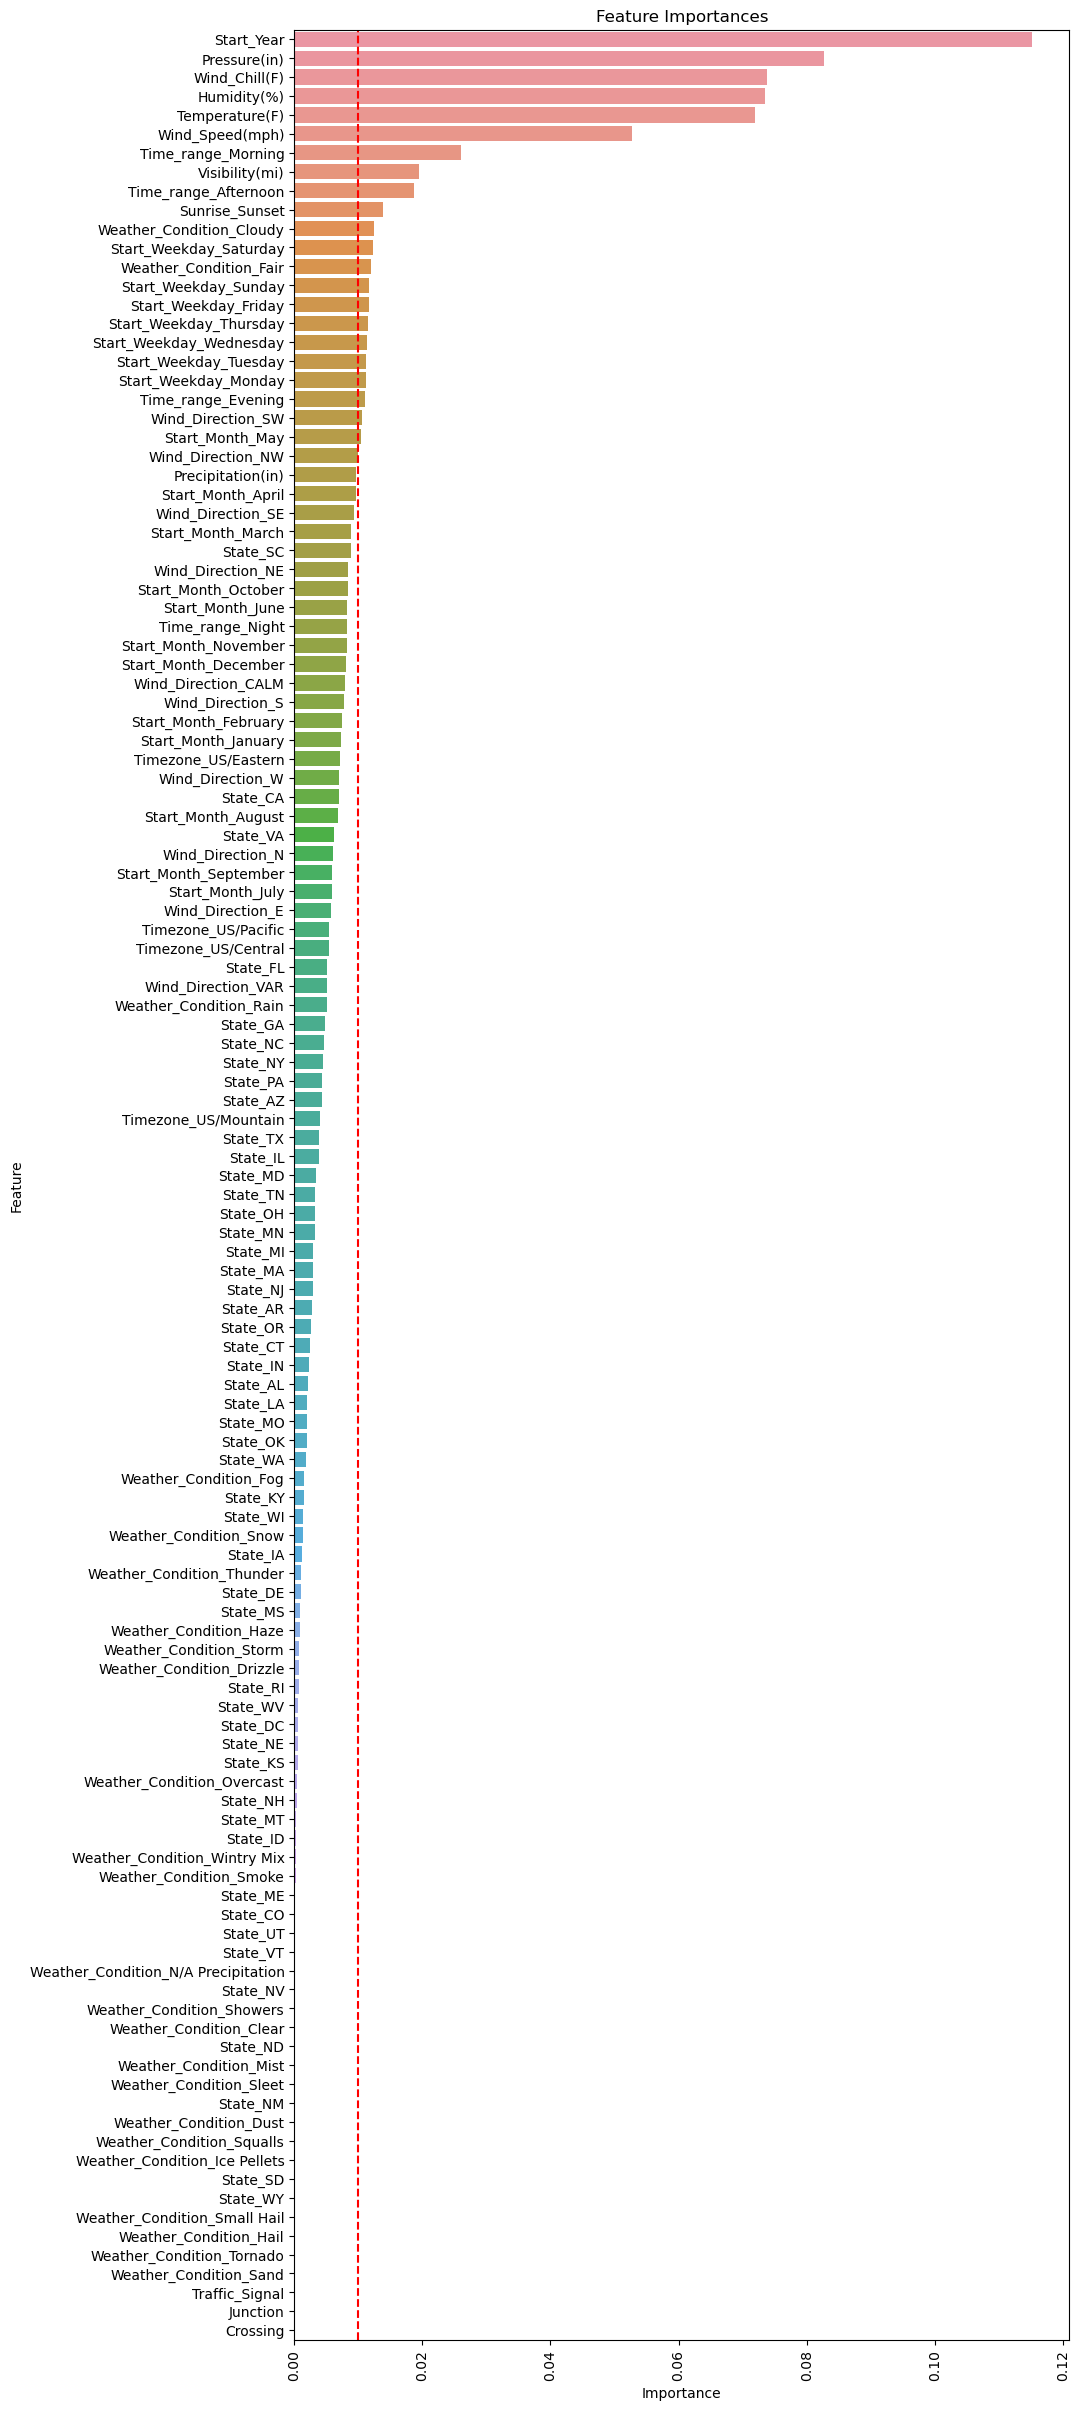

In [69]:
# Set the figure size
plt.figure(figsize=(10, 30))

# Create a bar plot of feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances)

# Add a vertical line at x=0.01
plt.axvline(x=0.01, color='red', linestyle='--')

# Set the labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Classification Models

In [71]:
features = ['Start_Year', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Time_range_Morning', 'Visibility(mi)', 'Time_range_Afternoon', 'Sunrise_Sunset',
           'Weather_Condition_Cloudy', 'Weather_Condition_Fair',  'Start_Weekday_Saturday', 'Start_Weekday_Friday', 'Start_Weekday_Thursday', 'Start_Weekday_Wednesday',
            'Start_Weekday_Sunday', 'Start_Weekday_Monday', 'Start_Weekday_Tuesday', 'Start_Month_May' ]
len(features)

20

In [70]:
# most important feautes from RandomForest algorith 
features = ['Start_Year', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Time_range_Morning', 'Visibility(mi)', 'Time_range_Afternoon', 'Sunrise_Sunset',
           'Weather_Condition_Cloudy', 'Weather_Condition_Fair',  'Start_Weekday_Saturday', 'Start_Weekday_Friday', 'Start_Weekday_Thursday', 'Start_Weekday_Wednesday',
            'Start_Weekday_Sunday', 'Start_Weekday_Monday', 'Start_Weekday_Tuesday', 'Start_Month_May' ]
X_train = X_train[features]
X_test = X_test[features]

# Define the models
models = [
    ('Logistic Regression', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)),
    ('Random Forest Classifier', RandomForestClassifier(min_samples_leaf=5, random_state=0)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=0)),
    ('Naïve Bayes (Gaussian)', GaussianNB())]

# Loop through each model and calculate ROC AUC OvR and ROC AUC OvO
for name, model in models:
    print(name)
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities for each class
    y_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    # Calculate ROC AUC OvR for each class
    classes = model.classes_
    roc_auc_ovr = {}
    avg_roc_auc_ovr = 0
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f"Accuracy: {accuracy:.4f}")
    
    for i in range(len(classes)):
        c = classes[i]
        df_aux = X_test.copy()
        df_aux['class'] = [1 if y == c else 0 for y in y_test]
        df_aux['prob'] = y_proba[:, i]
        df_aux = df_aux.reset_index(drop=True)

        roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
        avg_roc_auc_ovr += roc_auc_ovr[c]

    avg_roc_auc_ovr /= len(classes)

    # Calculate ROC AUC OvO for each combination of classes
    classes_combinations = []
    class_list = list(classes)

    for i in range(len(class_list)):
        for j in range(i + 1, len(class_list)):
            classes_combinations.append([class_list[i], class_list[j]])
            classes_combinations.append([class_list[j], class_list[i]])

    roc_auc_ovo = {}
    avg_roc_auc_ovo = 0

    for i in range(len(classes_combinations)):
        comb = classes_combinations[i]
        c1 = comb[0]
        c2 = comb[1]
        c1_index = class_list.index(c1)
        title = str(c1) + " vs " + str(c2)

        df_aux = X_test.copy()
        df_aux['class'] = y_test
        df_aux['prob'] = y_proba[:, c1_index]

        df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
        df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
        df_aux = df_aux.reset_index(drop=True)

        roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
        avg_roc_auc_ovo += roc_auc_ovo[title]

    avg_roc_auc_ovo /= len(classes_combinations)

    # Print the results
    
    print("ROC AUC OvR for each class:")
    for k in roc_auc_ovr:
        print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")

    print(f"Average ROC AUC OvR: {avg_roc_auc_ovr:.4f}")

    # Compare with sklearn (average only)
    roc_auc_ovr_sklearn = roc_auc_score(y_test, y_proba, labels=classes, multi_class='ovr', average='macro')
    print(f"Average ROC AUC OvR (by sklearn): {roc_auc_ovr_sklearn:.4f}")

    print("ROC AUC OvO for each combination:")
    for k in roc_auc_ovo:
        print(f"{k} ROC AUC OvO: {roc_auc_ovo[k]:.4f}")

    print(f"Average ROC AUC OvO: {avg_roc_auc_ovo:.4f}")

    # Compare with sklearn (average only)
    roc_auc_ovo_sklearn = roc_auc_score(y_test, y_proba, labels=classes, multi_class='ovo', average='macro')
    print(f"Average ROC AUC OvO (by sklearn): {roc_auc_ovo_sklearn:.4f}")

    print("====================================================")


Logistic Regression
Accuracy: 0.3113
ROC AUC OvR for each class:
1 ROC AUC OvR: 0.8379
2 ROC AUC OvR: 0.5925
3 ROC AUC OvR: 0.5359
4 ROC AUC OvR: 0.5478
Average ROC AUC OvR: 0.6285
Average ROC AUC OvR (by sklearn): 0.6285
ROC AUC OvO for each combination:
1 vs 2 ROC AUC OvO: 0.8448
2 vs 1 ROC AUC OvO: 0.8320
1 vs 3 ROC AUC OvO: 0.8056
3 vs 1 ROC AUC OvO: 0.7571
1 vs 4 ROC AUC OvO: 0.8283
4 vs 1 ROC AUC OvO: 0.7934
2 vs 3 ROC AUC OvO: 0.5772
3 vs 2 ROC AUC OvO: 0.5318
2 vs 4 ROC AUC OvO: 0.5583
4 vs 2 ROC AUC OvO: 0.5378
3 vs 4 ROC AUC OvO: 0.5517
4 vs 3 ROC AUC OvO: 0.5763
Average ROC AUC OvO: 0.6829
Average ROC AUC OvO (by sklearn): 0.6829
Random Forest Classifier
Accuracy: 0.4362
ROC AUC OvR for each class:
1 ROC AUC OvR: 0.9449
2 ROC AUC OvR: 0.6932
3 ROC AUC OvR: 0.7154
4 ROC AUC OvR: 0.6321
Average ROC AUC OvR: 0.7464
Average ROC AUC OvR (by sklearn): 0.7464
ROC AUC OvO for each combination:
1 vs 2 ROC AUC OvO: 0.9449
2 vs 1 ROC AUC OvO: 0.9150
1 vs 3 ROC AUC OvO: 0.9444
3 vs 1 RO

Calculate and display both the accuracy and the ROC AUC metrics for each model. This provide a comprehensive evaluation of the model's performance for both multiclass classification accuracy and its ability to discriminate between classes using the ROC AUC metric.